# Quality Uncorked


# Goals
* Discover drivers that cause customer to churn
* Use drivers to develop a machine learning model to classify the customer as churn or not. 
* Predict the quality of wine while incorporating unsupervised learning techniques.

## Imports

In [1]:
# importing the necessary libraries to run the code
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
import wrangle
from wrangle import clean_wine, split_wine

import model
from explore import print_den_v_sug, print_den_v_alc, ph_level, print_den_v_chlo
# # from explore import 

# from modeling import 
# from modeling import

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquire data from https://data.world/food/wine-quality
* Data size 5,320 rows and 13 columns.
* Each obsevation represent a different wine.
* Each column reperesents a feature or data point fof that wine

## Prepare

* Checked for nulls in the data (there were none)
* Checked that column data types were appropriate
* Encoded categorical variables (the wine type, red or white)
* Split data into train, validate and test (approx. 60/20/20)
* Outliers have not been removed for this iteration of the project

In [2]:
# used my wrangle function that acquires, preps and cleans the data
df = wrangle.clean_wine()

# splits data train, validate, test
train, validate, test = wrangle.split_wine()

# Data At a Glance

In [3]:
# display the train data
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
2828,7.5,0.15,0.38,1.8,0.054,19.0,101.0,0.99460,3.24,0.44,10.0,5,1
2209,7.6,0.16,0.44,1.4,0.043,25.0,109.0,0.99320,3.11,0.75,10.3,6,1
4327,6.7,0.13,0.32,3.7,0.017,32.0,99.0,0.99348,3.12,0.44,10.0,6,1
3340,6.9,0.30,0.29,1.3,0.053,24.0,189.0,0.99362,3.29,0.54,9.9,4,1
1187,7.2,0.67,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6,0


In [4]:
# display a snapshot of summary statistics
train.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
count,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000
mean,7.185347,0.343679,0.312843,5.057033,0.056383,30.046828,113.733635,0.994528,3.230232,0.533118,10.544480,5.797919,0.746559
std,1.292829,0.166998,0.147245,4.546493,0.036324,17.296293,55.913432,0.002971,0.161362,0.148498,1.187491,0.872755,0.435054
min,3.800000,0.085000,0.000000,0.600000,0.014000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,74.500000,0.992300,3.120000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994600,3.220000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.410000,0.390000,7.400000,0.066000,41.000000,153.000000,0.996730,3.340000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,146.500000,307.500000,1.038980,4.010000,1.980000,14.900000,9.000000,1.000000


# Explore

## * How does residual affect sugars density?

density vs residual sugar


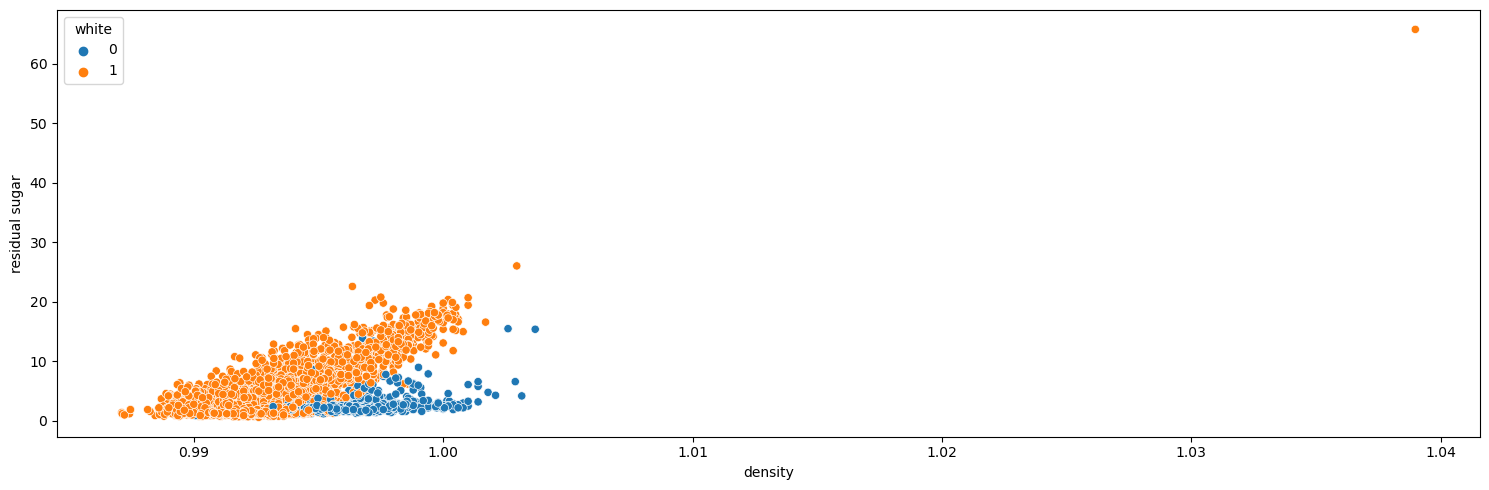

In [5]:
print_den_v_sug()

### Takeaways:

* As the visuals indicates there seems to be a realtionship with white wine
* Wines that had less than 7 in residual sugar and socred over 7 in quality are 466
* Red wines are note as sweet

## * How does alocohol affect density?

density vs alcohol


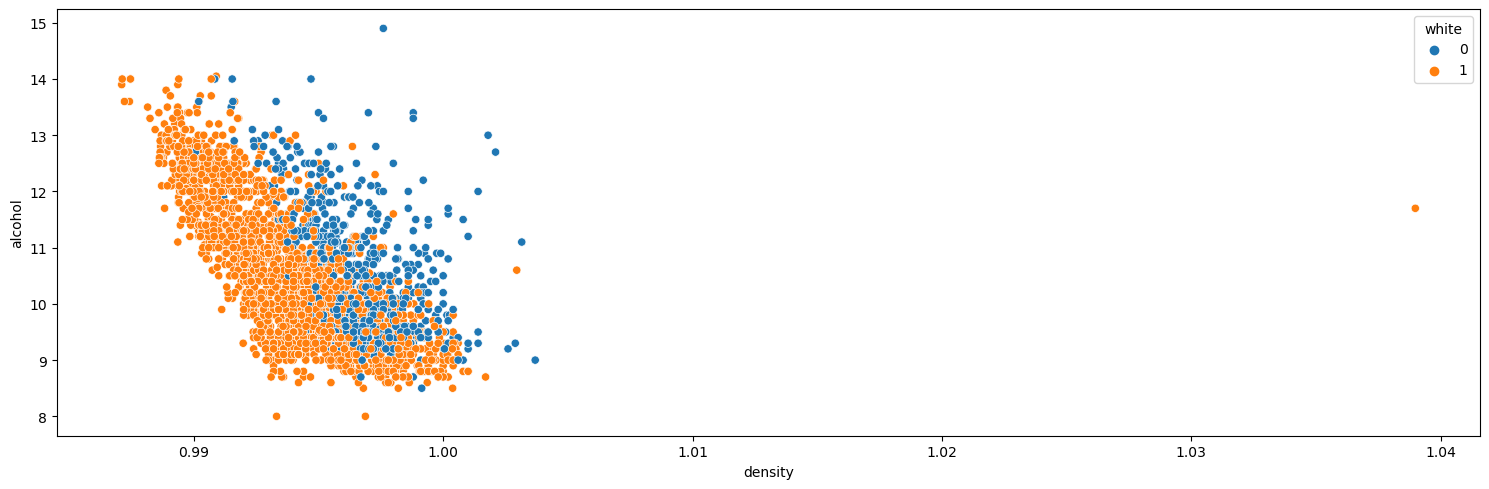

In [6]:
print_den_v_alc()

### Takeaways:
* As the density increases the alcohol content drops
* Wines that had a 12 or more in alcohol and socred over 7 in quality are 237
* Red wines have higher alcohol content at a slighty higher density

# Stats Testing

## Hypothesis:

H 0 : There is no linear correlation between density and alcohol.

H a : There is a linear relationship between density and alcohol.

## Pearson's R-test¶

In [7]:
x = train.density
y = train.alcohol

α = 0.05

corr, p = stats.pearsonr(x, y)
corr, p

(-0.6476257502189403, 0.0)

## P-value less than alpha?

In [8]:
p < α

True

### We can reject the null hypothesis.


## * Is the average pH higher in red or white wine?

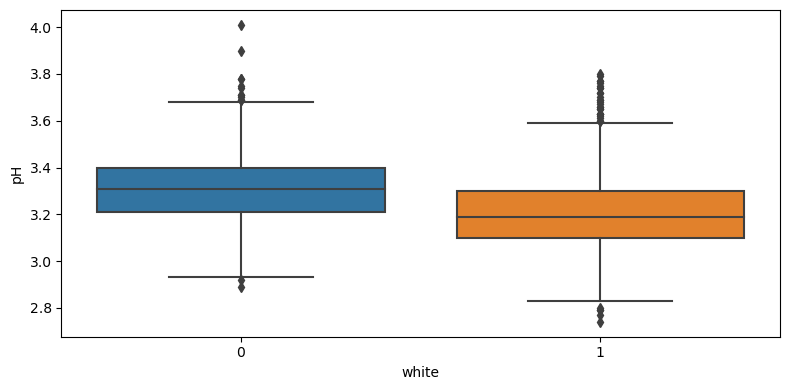

In [9]:
ph_level()

### Takeaways:

* Red wines have a higher pH on avaerage
* It is more that all the payment methods combined

# Stats Testing
## Hypothesis:
H
0
: The average pH level in red and white wines is the same.

H
a
: The average pH in is greater in red wines.
## T-test

In [10]:
# getting the valiues for the red wine pH levels and the average mean for the entire data
t, p = stats.ttest_1samp(train[train['white']==0].pH, train.pH.mean())

print(t, p/2, α)


15.23536184587938 3.4075554640231897e-46 0.05


In [11]:
bool((1/2 * p < α) and (t > 0))

True

### We can reject the null hypothesis.


## * How do chlorides affect density?

density vs chlorides


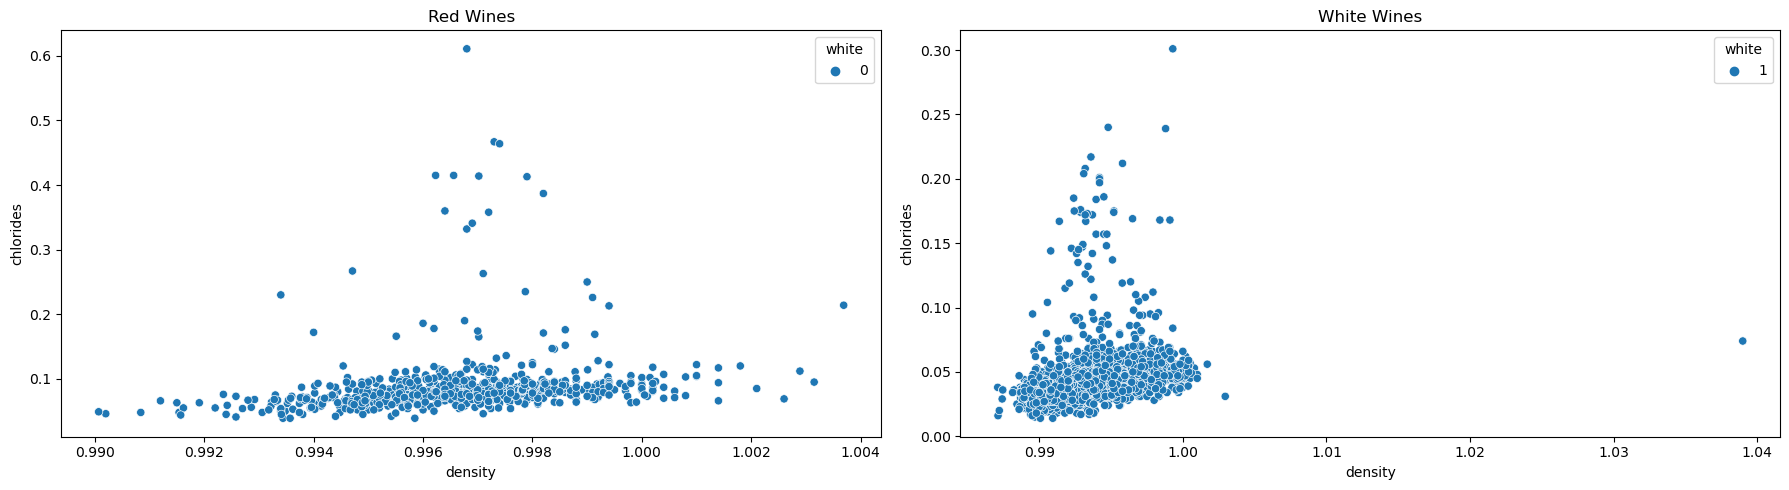

In [12]:
print_den_v_chlo()

### Takeaways
* Chlorides can enhance the perception of acidity in wine. This means that the wine may taste more tangy, crisp, and bright
* As the density measure so does our chlorides
* There are a few outliers that do not follow the trend

# Evaluation Summary:

* Sugar is a driver for quality but 
* "contract_type" was found to be a driver of "churn" due to the high number of customers churning on month to month contracts
* "payment_type" was found to be a driver of "churn" due to the high number of customers churning on with manual payments
* "monthly_charges" was found to be a driver of "churn"
* The median charges for customers who churned \$\ $74.70 while the non churn customers was $64.95

* "internet_service_type" category: DSL was not found to be a driver of "churn"

2_cluster,0,1,2,3
quality,,,,
3,1,9,2,6
4,4,45,23,41
5,31,547,115,267
6,214,329,366,426
7,188,34,175,75
8,50,2,21,4
9,4,0,0,0


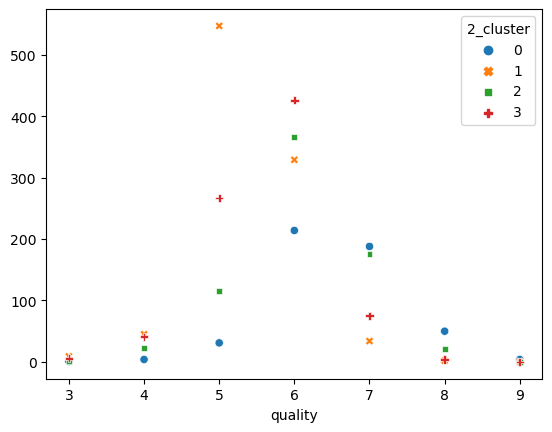

In [13]:
model.scatter_2_cluster()

3_cluster,0,1,2,3
quality,,,,
3,7,7,1,3
4,31,38,10,34
5,322,269,61,308
6,279,265,317,474
7,27,63,243,139
8,1,3,57,16
9,0,0,4,0


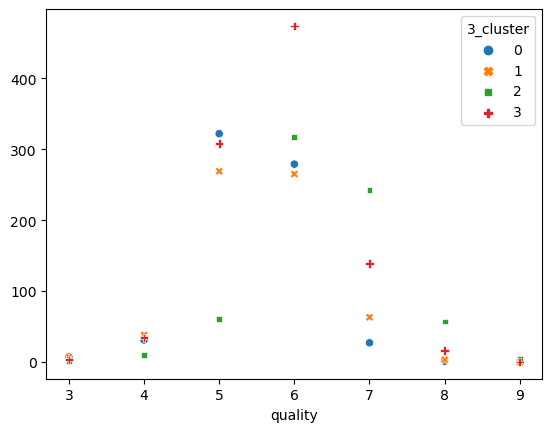

In [14]:
model.scatter_3_cluster()

4_cluster,0,1,2,3
quality,,,,
3,7,7,1,3
4,40,41,8,24
5,461,282,36,181
6,425,175,260,475
7,53,10,213,196
8,3,0,54,20
9,0,0,4,0


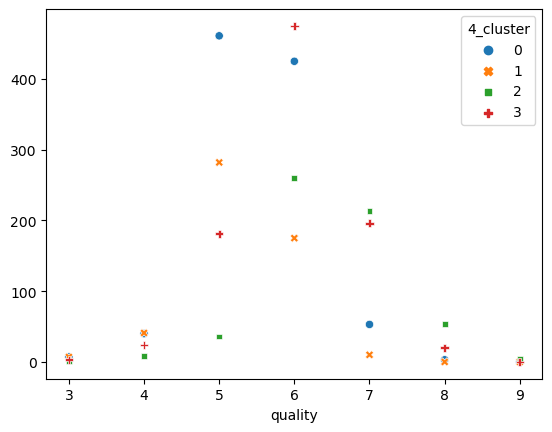

In [15]:
model.scatter_4_cluster()

---

# 2 Feature Clusters

## ANOVA Stat Testing

In [16]:
model.anova_test_2_feat()

3.1571650288042627e-168 < 0.05         We can reject the Null Hypothesis. The four clusters types in the feature clustersed are different from each other.


## (OLS) Linear Regression Model Testing

In [17]:
model.linear_regression_two_features()

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7211273079762994 
Validation/Out-of-Sample:  0.7359635148277895


---

# 3 Feature  Clusters

## ANOVA Stat Testing

In [18]:
model.anova_test_3_feat()

1.971623141650418e-121 < 0.05         We can reject the Null Hypothesis. The four clusters types in the feature clustersed are different from each other.


## (OLS) Linear Regression Model Testing

In [19]:
model.linear_regression_three_features()

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7207296516941156 
Validation/Out-of-Sample:  0.7347082198217385


---

# 4  Feature Clusters

## ANOVA Stat Testing

In [20]:
model.anova_test_4_feat()

1.4468161088877943e-175 < 0.05         We can reject the Null Hypothesis. The four clusters types in the feature clustersed are different from each other.


## (OLS) Linear Regression Model Testing

In [21]:
model.linear_regression_four_features()

RMSE for OLS using LinearRegression
Training/In-Sample:  0.7208419505176564 
Validation/Out-of-Sample:  0.735227613432521


# Polynomial

## Plynomial Regression Model Testing

In [22]:
model.quadratic_model()

RMSE for Polynomial Model, degrees= 2 
Training/In-Sample:  0.7211273079762994 
Validation/Out-of-Sample:  0.7362221657724728


# Comparing Summary
* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* The Logistic Regression model preformed poorly. I may need to revisit and

* The KNN Model was selected to run the test data. This model also was 2 points better than baseline but seemed to be most stable when charting the resukts.

# Linear Regression on Test

In [23]:
model.test()

RMSE for OLS using LinearRegression
Test:  0.748810611825515



## Modeling Summary

* Clustering based on 2 features (density and alcohol), 3 features (residual sugar, total sulfur dioxide, alcohol), and 4 features (volatile acidity, chlorides, density, alcohol) with k=4 for each produced divergent clusters that performed nearly identically in the final regression models.
* An ANOVA test was performed to show that the clustered groups were in fact different and valuable 
* We kept the clusters in new dummy columns and used them as features to perform Logistic and Polynomial Regression on.
* Our models all performed around with an RMSE around .72 for the Train data, .73 for the validate data.
* Our test RMSE using 2 clusters came out at .75 units of quality
* We beat our baseline based on mean of .87 units by .12 points.

# Conclusion

## Exploration Summary
* Customers with Fiber Optics have more churn than DSL.
* Encouraging customers to be on automatic payment plan will seems to reduce churn.
* 643 manual check writers churned which is a 45% churn rate for all payment types.
* When the monthly charges reached approximate \$70 the churn rate rised.
* The median monthly payment for customers who churns is \$79.70


## Modeling
* The final model marginally outperformed baseline. Possible reasons include:

We used all the features and we did not correct for multicolinearity for this mvp.
For future models a more careful selection of less features in the linear regression would be helpful.

## Recommendations
* In a future model, consider dropping or combining features through feature engineering in order to reduce multicolinearity issues.  For example total sulfur dioxide and free sulfur dioxide do not both need to be in the model.  Also Alcohol and density are highly correlated as is residual sugar.  
* Reducing the total number of columns may help in creating a better linear regression.
* Classification also might provide a better result.

## Next Steps
* Next steps include reevaluating the efficacy of the clustering all together.  If it shows a better result with different features, then we can hone in and narrow our focus with feature engineering where we combine correlated features and drop columns that do not add to our model.  
* Perhaps also there are differing determinants of quality between red and white wine and "manually clustering" the two might be an interesting to explore what features are in fact different between the two populations and if that has a differential impact of quality vs predicted quality.